In [44]:
# This is a notebook to run a simple binary classification algorithm, using Decision Trees.

# Author: Viviana Acquaviva
# License: BSD but really should be TBD - just be nice.

import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

# Notes: 

# Data come from here
#from astroML.datasets import fetch_rrlyrae_combined
#X, y = fetch_rrlyrae_combined()

### Ok, now time to get real!

The previous data set was just a small/curated selection of the total, which is the one below. Let's read it in:

In [45]:
Xbig = pd.read_csv('RRLyrae_features.txt', names=['u-g', 'g-r', 'r-i', 'i-z'])
Ybig = pd.read_csv('RRLyrae_labels.txt', header=None).astype(int)

# Downsample for plotting
f = 0.05 # Fraction to subsample
i = 1234 # Random state
Xsmall = Xbig.sample(frac=f, random_state=i)
Ysmall = Ybig.sample(frac=f, random_state=i)

Let's plot ALL the data, ahem!

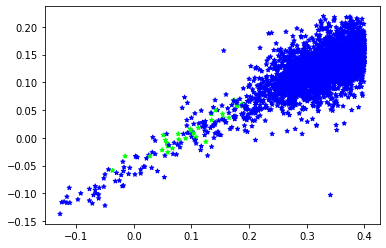

In [46]:
#plt.scatter(Xbig['u-g'], Xbig['r-i'], c=Ybig.iloc[:,0].values, marker='*', s=20, label=None, cmap='brg')
plt.scatter(Xsmall['u-g'], Xsmall['r-i'], c=Ysmall.iloc[:,0].values, marker='*', s=20, label=None, cmap='brg')
plt.show()

And let's take a look at how many positive examples (variable stars) we have.

In [47]:
print('Number of positive examples:', Ybig.sum().values[0]) 
print('Total number of examples:', Ybig.size)

Number of positive examples: 483
Total number of examples: 93141


### Let's do some data thinking.

<br>
What is noticeable about this data set?

Do you expect a decision tree to be an optimal classifier, based on the shape of the data?

How would a classifier that puts everything in the "non-RR Lyrae" box fare on this data set?

In [48]:
# Answers go here :) 

# What is noticeable about this data set?
# Data is imbalanced!

# Do you expect a decision tree to be an optimal classifier, based on the shape of the data?
# Probably not, with current features

# How would a classifier that puts everything in the "non-RR Lyrae" box fare on this data set?
# Accuracy would be (93141-483)/93141 -> pretty close to 1; recall would be 0; precision would be undefined :( 

number_of_normal_stars = Ybig.size-Ybig.sum().values[0]
number_of_variable_stars = Ybig.sum().values[0]

TP = 0.
FP = 0.
TN = number_of_normal_stars
FN = number_of_variable_stars

# Accuracy 
# Very close to 1
print('Accuracy:', (TP+TN)/(TP+FP+TN+FN))

# Recall
# Zero (I think)
print('Recall:', TP/(TP+FN))

# Precision
# Undefined (0/0)
if (TP+FP == 0.):
    print('Precision: Undefined')
else:
    print('Precision:', TP/(TP+FP))

Accuracy: 0.99481431378233
Recall: 0.0
Precision: Undefined


Let's take a look at how our previous algorithm would fare on this data set.

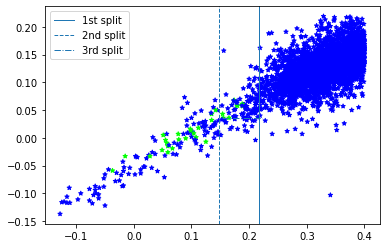

In [49]:
# The numbers here are taken from the example with a small data set from last week
#plt.scatter(Xbig['u-g'], Xbig['r-i'], c=Ybig.iloc[:,0].values, marker='*', s=20, label=None, cmap='brg')
plt.scatter(Xsmall['u-g'], Xsmall['r-i'], c=Ysmall.iloc[:,0].values, marker='*', s=20, label=None, cmap='brg')
plt.axvline(x=0.218, linewidth=1, label='1st split')
plt.axvline(x=0.147, linewidth=1, ls='--', label='2nd split')
plt.axhline(y=0.035, linewidth=1, ls='-.', xmin=0.53, xmax=0.65, label='3rd split')
plt.legend()
plt.show()

Question: How is our old tree doing? What is it getting right and wrong?

In [50]:
# Answers go here. 
# Clearly the model is quite shit

Let's do our training process again! Here we don't have separate train and test splits so we can create them, we'll call them X_trainb, X_testb etc (for "big"). Note: we are not doing cross validation yet, which is bad!

In [51]:
# Make some splitting into test and training set
X_trainb, X_testb, Y_trainb, Y_testb = train_test_split(Xbig, Ybig, random_state=5)

Define and fit the model:

In [52]:
# Fill this in
modelbig = DecisionTreeClassifier()
modelbig.fit(X_trainb, Y_trainb)

DecisionTreeClassifier()

We can use the same plotting routine as above to visualize the new tree:

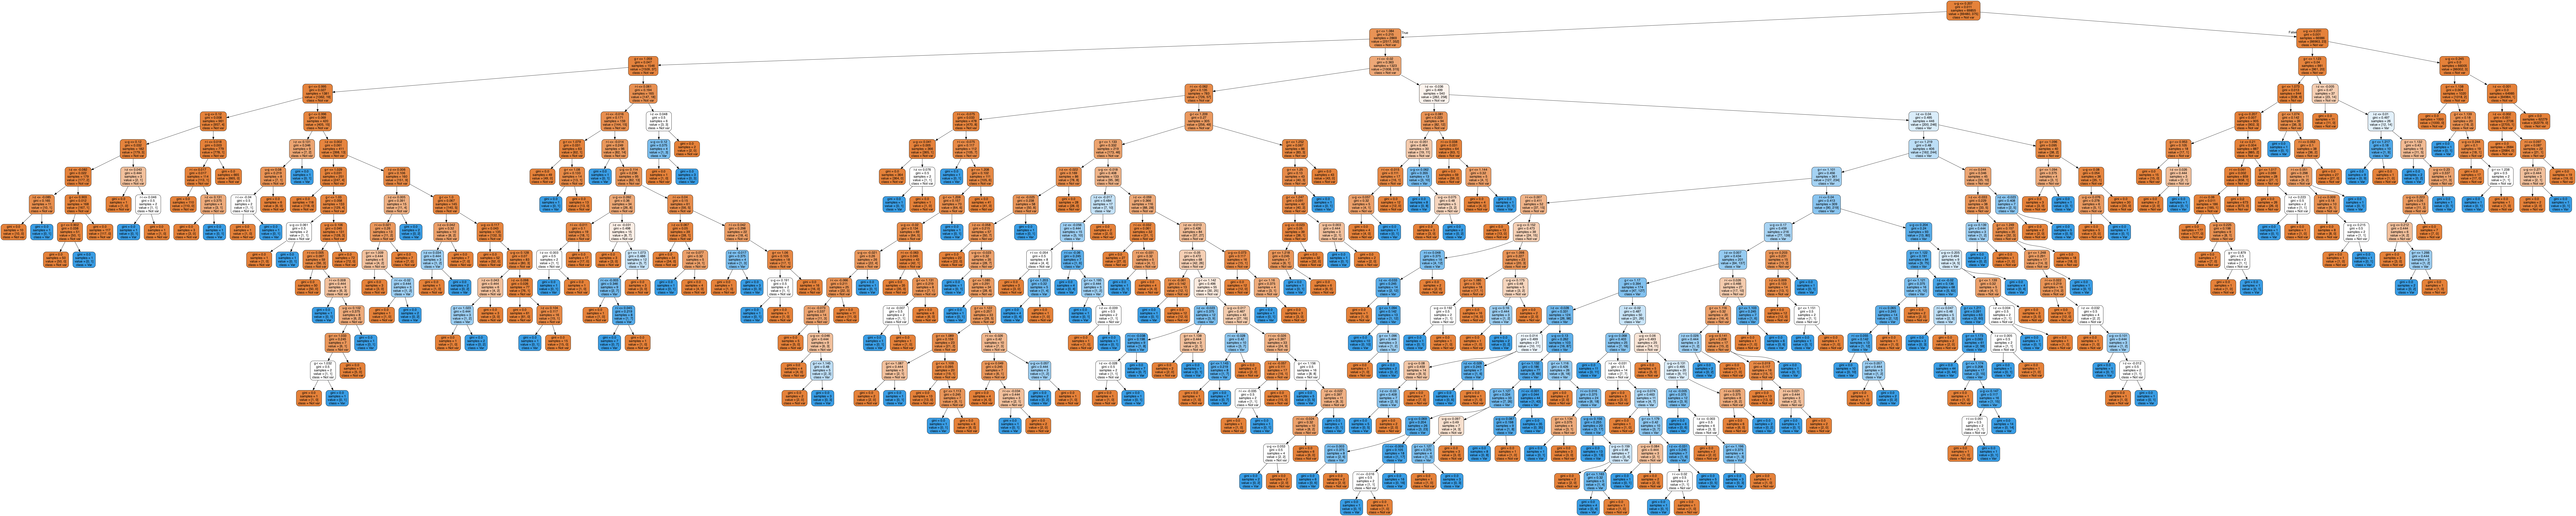

In [53]:
# Plot the model
dot_data = StringIO()
export_graphviz(
            modelbig, # note name change
            out_file=dot_data,
            feature_names=list(X_trainb.columns), # here too
            class_names=['Not var','Var'],
            filled=True,
            rounded=True,
            )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Now let's take a look at those colors and then evaluate how the tree is doing on the training set.

In [54]:
# Fill this in

# 100% accuracy, but goes down to very far leaves

Let's check the performance on the test set.

In [55]:
# Fill this in

# Make the model predictions for the test data
Y_pred = modelbig.predict(X_testb)

# Calculate the metrics
print('Accuracy:', metrics.accuracy_score(Y_testb, Y_pred))
print('Recall:', metrics.recall_score(Y_testb,Y_pred))
print('Precision:', metrics.precision_score(Y_testb, Y_pred))
print()

# Full confusion matrix
print('Confusion matrix: [[TN, FP], [FN, TP]]')
print(metrics.confusion_matrix(Y_testb, Y_pred))
print()

Accuracy: 0.9951902430645023
Recall: 0.6296296296296297
Precision: 0.4857142857142857

Confusion matrix: [[TN, FP], [FN, TP]]
[[23106    72]
 [   40    68]]



### Recap: what have we seen so far?

Let's talk about what we should be doing to optimize this classifier, going back to the tools we mentioned.

In [56]:
# Ideas here

# 1. Balance the data sets; limit the depth
# 2. k fold cross validation
# 3. Check that we have enough data
# 4. Engineer new features

In [57]:
# Look at the properties of the first attempt
modelbig

DecisionTreeClassifier()

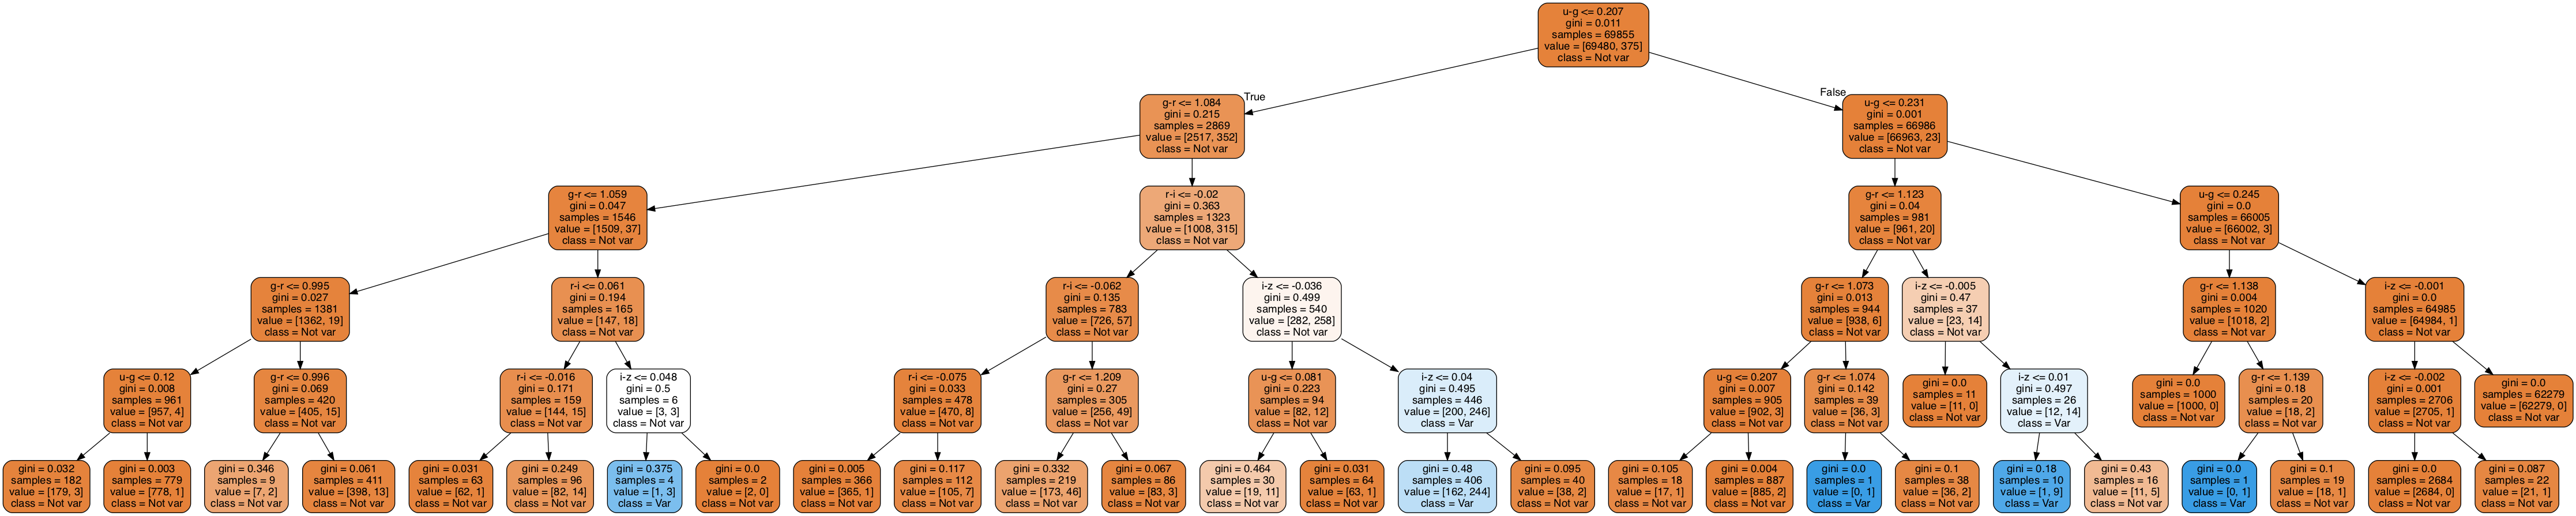

In [58]:
# We can customize this cell as we try new models (e.g., changing max_depth)
modelX = DecisionTreeClassifier(max_depth=5, random_state=5)
modelX.fit(X_trainb, Y_trainb)
dot_data = StringIO()
export_graphviz(
            modelX,
            out_file=dot_data,
            feature_names=list(X_trainb.columns),
            class_names=['Not var','Var'],
            filled=True,
            rounded=True,
            )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [59]:
# And then look at some of these to see what is happening

print('Training metrics')
print('Accuracy:', metrics.accuracy_score(Y_trainb, modelX.predict(X_trainb)))
print('Precision:', metrics.precision_score(Y_trainb, modelX.predict(X_trainb)))
print('Recall:', metrics.recall_score(Y_trainb, modelX.predict(X_trainb)))
print()

print('Test metrics')
print('Accuracy:', metrics.accuracy_score(Y_testb, modelX.predict(X_testb)))
print('Precision:', metrics.precision_score(Y_testb, modelX.predict(X_testb)))
print('Recall:', metrics.recall_score(Y_testb, modelX.predict(X_testb)))
print()

Training metrics
Accuracy: 0.9959773817192756
Precision: 0.6113744075829384
Recall: 0.688

Test metrics
Accuracy: 0.9954049643562656
Precision: 0.5035971223021583
Recall: 0.6481481481481481



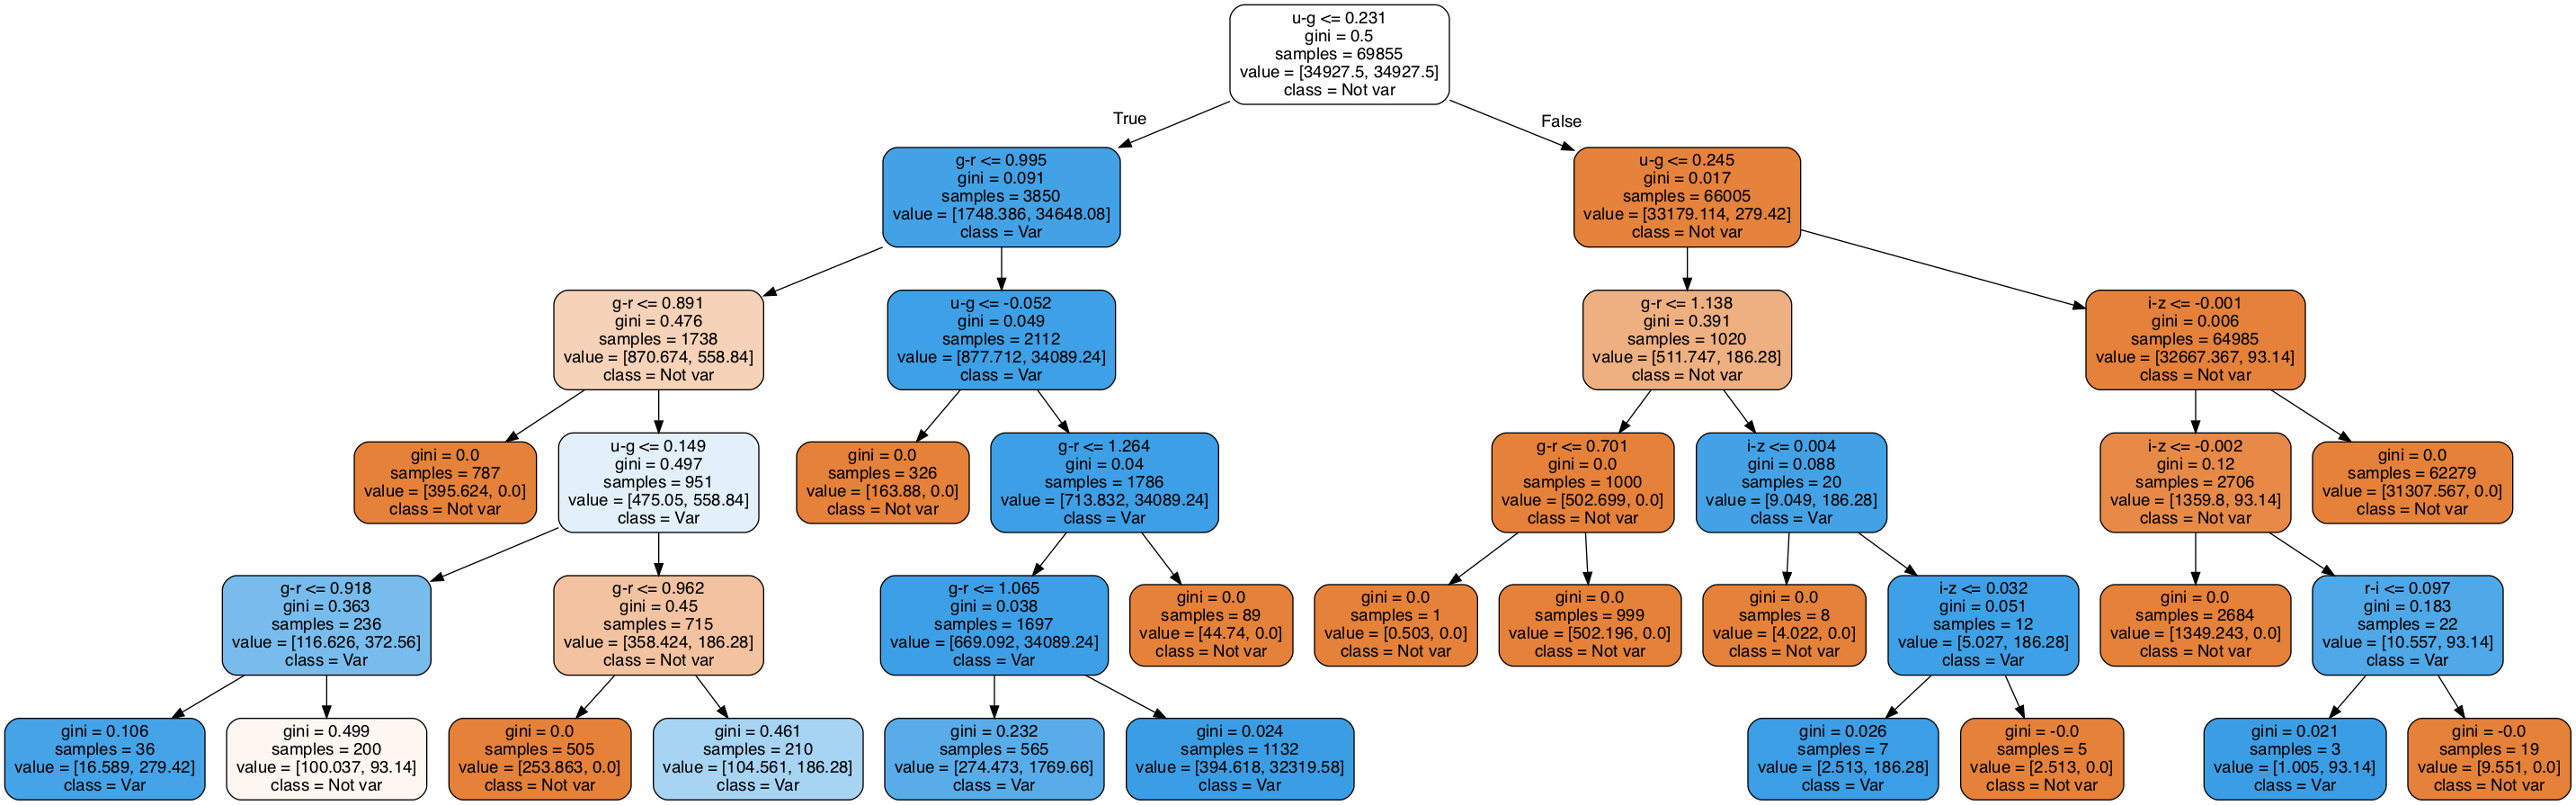

In [60]:
# We can customize this cell as we try new models (e.g., changing the weight and max_depth)
modelX = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=5)
modelX.fit(X_trainb, Y_trainb)
dot_data = StringIO()
export_graphviz(
            modelX,
            out_file=dot_data,
            feature_names=list(X_trainb.columns),
            class_names=['Not var','Var'],
            filled=True,
            rounded=True,
            )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [61]:
# And then look at some of these to see what is happening

print('Training metrics')
print('Accuracy:', metrics.accuracy_score(Y_trainb, modelX.predict(X_trainb)))
print('Precision:', metrics.precision_score(Y_trainb, modelX.predict(X_trainb)))
print('Recall:', metrics.recall_score(Y_trainb, modelX.predict(X_trainb)))
print()

print('Test metrics')
print('Accuracy:', metrics.accuracy_score(Y_testb, modelX.predict(X_testb)))
print('Precision:', metrics.precision_score(Y_testb, modelX.predict(X_testb)))
print('Recall:', metrics.recall_score(Y_testb, modelX.predict(X_testb)))
print()

Training metrics
Accuracy: 0.9773817192756424
Precision: 0.19150025601638504
Recall: 0.9973333333333333

Test metrics
Accuracy: 0.9774542643648544
Precision: 0.1653290529695024
Recall: 0.9537037037037037



###  How to do k-fold cross validation: cross_val_score and cross_val_predict (and cross_validate)

In [62]:
# Importing some useful stuff
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

Let's start with a simple K fold with 10 splits.

In [63]:
# CV stands for cross validation here
cv = KFold(n_splits=10) 

# This does a lot of things
scores = cross_val_score(modelX, Xbig, Ybig, cv=cv, scoring='recall')

print('All scores:', scores)
print()

print('Mean score:', scores.mean())
print('Score standard deviation:', scores.std())

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

All scores: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Mean score: 0.0
Score standard deviation: 0.0


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


What happened?

In [64]:
# Fill

# You need to define shuffle=True because all the variable stars (value 1 in the table) are at the end of the table

We can try again.

In [65]:
# CV is cross-validation strategy
cv = KFold(n_splits=10, shuffle=True) # Fill

scores = cross_val_score(modelX, Xbig, Ybig, cv=cv, scoring='recall')

print('All scores:', scores)
print('Mean score:', scores.mean())
print('Score standard deviation:', scores.std())

All scores: [1.         0.984375   0.97777778 0.975      0.97727273 0.93617021
 0.96226415 0.98       0.96153846 0.97959184]
Mean score: 0.9733990167033013
Score standard deviation: 0.016116428570433976


#### For severely imbalanced classifiers, stratification (the process of conserving the class membership distribution in each fold) might help. Let's stratify and shuffle (although TBH stratification does shuffle!)

In [66]:
# CV is cross-validation strategy
# Statified here means that class membership is preserved
cv = StratifiedKFold(shuffle=True, n_splits=10)

scores = cross_val_score(modelX, Xbig, Ybig, cv = cv, scoring = 'recall')

print('All scores:', scores)
print('Mean score:', scores.mean())
print('Score standard deviation:', scores.std())

All scores: [0.97959184 0.97916667 0.9375     0.97916667 1.         0.9375
 1.         0.97916667 0.91836735 0.95918367]
Mean score: 0.9669642857142857
Score standard deviation: 0.026357835333712547


If you are curious about Stratified K Fold vs K Fold...

In [67]:
# Define the cross validation... thing
cv = KFold(shuffle=True, n_splits=10)

In [68]:
# We see here that the test samples have different numbers of members
for train, test in cv.split(Xbig, Ybig):
    print('train - {}| test - {}'.format(
        np.bincount(Ybig.values.ravel()[train]), np.bincount(Ybig.values.ravel()[test])))

train - [83409   417] | test - [9249   66]
train - [83399   428] | test - [9259   55]
train - [83391   436] | test - [9267   47]
train - [83380   447] | test - [9278   36]
train - [83383   444] | test - [9275   39]
train - [83400   427] | test - [9258   56]
train - [83393   434] | test - [9265   49]
train - [83387   440] | test - [9271   43]
train - [83392   435] | test - [9266   48]
train - [83388   439] | test - [9270   44]


In [69]:
# Define the cross validation... thing
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [70]:
# We see here that the test samples have almost the same number of members +/- 1
for train, test in cv.split(Xbig, Ybig):
    print('train - {}| test - {}'.format(
    np.bincount(Ybig.values.ravel()[train]), np.bincount(Ybig.values.ravel()[test])))

train -  [83392   434]   |   test -  [9266   49]
train -  [83392   435]   |   test -  [9266   48]
train -  [83392   435]   |   test -  [9266   48]
train -  [83392   435]   |   test -  [9266   48]
train -  [83392   435]   |   test -  [9266   48]
train -  [83392   435]   |   test -  [9266   48]
train -  [83392   435]   |   test -  [9266   48]
train -  [83392   435]   |   test -  [9266   48]
train -  [83393   434]   |   test -  [9265   49]
train -  [83393   434]   |   test -  [9265   49]


### How can we find the confusion matrix in a cross-validation scheme?

One possibility is to use the cross_val_predict utility function, which gives one realization obtained by combining the predictions on each of the test folds (should not be used for evaluation because it does not have uncertainty.)

In [71]:
# Make predicitons by combining teach test fold
Y_pred = cross_val_predict(modelX, Xbig, Ybig, cv=cv) #No scoring parameter here

In [72]:
# Make and show the confusion matrix
cm = metrics.confusion_matrix(Ybig, Y_pred)
print(cm)

[[90454  2204]
 [   16   467]]


In [73]:
# Helper function to make a nice confusion matrix plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="green" if i == j else "red", fontsize = 30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[90454  2204]
 [   16   467]]


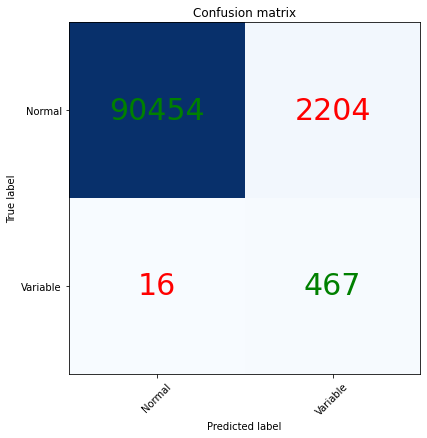

In [74]:
# Show a neat confusion matrix
plot_confusion_matrix(cm, classes = ['Normal', 'Variable'])

### A word about the cross_validate function

The function cross_validate is nice because it allows you to check train/test scores within the cross validation process (while so far we had only done this on a train/test split)

In [75]:
cross_validate(modelX, Xbig, Ybig, scoring='recall', cv=cv, return_train_score=True)

{'fit_time': array([0.08181715, 0.10993314, 0.09404087, 0.08986902, 0.10798717,
        0.08492112, 0.0859797 , 0.0838263 , 0.08732271, 0.11088276]),
 'score_time': array([0.00348592, 0.00471783, 0.00448513, 0.00396609, 0.00334501,
        0.003474  , 0.00331306, 0.00335789, 0.00437498, 0.00388312]),
 'test_score': array([0.95918367, 0.97916667, 0.9375    , 0.9375    , 0.97916667,
        0.95833333, 0.97916667, 0.97916667, 1.        , 0.95918367]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

### Learning curves

They give a view of the train/test gap and allow us to check whether more data would help.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [76]:
# This helps visualize the training vs the test. 
# Will help us visualize and see what would happen if we use more data or if the data has plateaued. 

from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    scaler = sklearn.preprocessing.StandardScaler()
    X = scaler.fit_transform(X)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation test score")

    plt.legend(loc="best")
    return plt

In [77]:
cv = StratifiedKFold(n_splits=10)

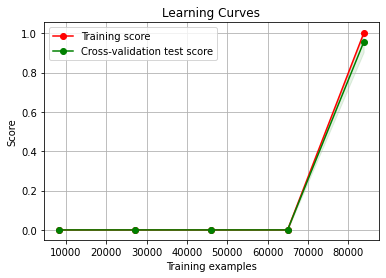

In [78]:
plot_learning_curve(modelX, 'Learning Curves', Xbig, Ybig, cv=cv, scoring='recall')
plt.show()

What is happening up there?

In [79]:
# Some non shuffling is being a problem here

In [80]:
# Useful shuffling routines
from sklearn.utils import shuffle
XbigS, ybigS = shuffle(Xbig, Ybig)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

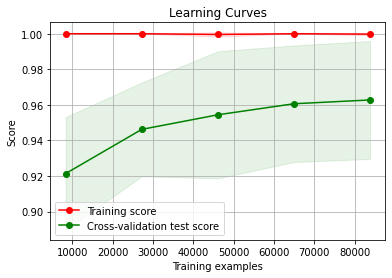

In [81]:
# Make a learning curve with the new shuffled data
plot_learning_curve(modelX, 'Learning Curves', XbigS, ybigS, cv=cv, scoring='recall')

Conclusions?

In [82]:
# Looks like the large amount of data is helping